In [30]:
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols
import numpy as np
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt

In [23]:
# R로 Box-Cox Transformation 결과 람다는 2 나옴
df= pd.read_csv('happy_0814.csv', header=0)
model = ols("np.square(HS)~  C(country)+ log_gdp + social+ life_exp + freedom+ generosity+ corruption+ schooling+ alcohol+ suicide+ obesity+ birth+ mental", data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.square(HS)   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     125.3
Date:                Fri, 13 Aug 2021   Prob (F-statistic):               0.00
Time:                        17:18:50   Log-Likelihood:                -5003.4
No. Observations:                1881   AIC:                         1.034e+04
Df Residuals:                    1716   BIC:                         1.125e+04
Df Model:                         164                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                -73.8005      8.353     -8.835      0.000     -90.184     -57.417
C(country)[T.Albania]                     -0.2323      2.648     -0.088      0.930      -5.426       4.961
C(country)[T.Algeria]                      3.6627      2.482      1.475      0.140      -1.206       8.531
C(country)[T.Angola]                     -14.1848      2.763     -5.134      0.000     -19.604      -8.766
C(country)[T.Argentina]                    2.1454      2.953      0.726      0.468      -3.647       7.938
C(country)[T.Armenia]                     -1.5153      2.855     -0.531      0.596      -7.114       4.084
C(country)[T.Australia]                    3.7333      4.041      0.924      0.356      -4.193      11.660
C(country)[T.Austria]                      2.9948      3.785      0.791      0.429      -4.429      10.419
C(country)[T.Azerbaijan]                  -2.3324      2.790     -0.836      0.403      -7.806       3.141
C(country)[T.Bahrain]                     -7.7592      3.830     -2.026      0.043     -15.271      -0.247
C(country)[T.Bangladesh]                   3.5253      2.420      1.456      0.145      -1.222       8.273
C(country)[T.Belarus]                      4.9756      4.170      1.193      0.233      -3.204      13.155
C(country)[T.Belgium]                     -0.8825      3.918     -0.225      0.822      -8.566       6.801
C(country)[T.Belize]                      14.9750      3.491      4.290      0.000       8.128      21.822
C(country)[T.Benin]                       -4.6452      1.737     -2.674      0.008      -8.053      -1.238
C(country)[T.Bhutan]                      -9.8863      3.433     -2.880      0.004     -16.619      -3.154
C(country)[T.Bolivia]                      5.8552      2.276      2.573      0.010       1.391      10.319
C(country)[T.Bosnia and Herzegovina]       2.3909      2.830      0.845      0.398      -3.160       7.942
C(country)[T.Botswana]                   -22.7712      2.973     -7.658      0.000     -28.603     -16.939
C(country)[T.Brazil]                      10.9534      2.736      4.003      0.000       5.587      16.320
C(country)[T.Bulgaria]                    -9.2491      3.271     -2.828      0.005     -15.664      -2.834
C(country)[T.Burkina Faso]                -3.1190      1.754     -1.778      0.076      -6.559       0.321
C(country)[T.Burundi]                      7.8382      2.293      3.418      0.001       3.341      12.336
C(country)[T.Cambodia]                    -4.8470      2.311     -2.097      0.036      -9.380      -0.314
C(country)[T.Cameroon]                    -2.2065      1.871     -1.179      0.238      -5.876       1.463
C(country)[T.Canada]                       5.7194      3.829      1.494      0.135     

In [24]:
# 싸이킷런 MinMaxScaler 으로 정규화
from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler()
x= df[['log_gdp', 'social', 'life_exp', 'freedom','generosity', 'corruption', 
       'schooling', 'alcohol', 'suicide','obesity', 'birth', 'mental']]
scale = transformer.fit_transform(x)
scale
df_scale2= pd.DataFrame(scale)
df_scale2.columns = ['log_gdp', 'social', 'life_exp', 'freedom', 'generosity', 'corruption', 'schooling', 'alcohol',
                     'suicide','obesity', 'birth', 'mental']
# 정규화 안한 컬럼 df_scaler에 추가
df_scale2[['HS','year','country','continent']]= df[['HS','year','country','continent']]
df_scale2

,log_gdp,social,life_exp,freedom,generosity,corruption,schooling,alcohol,suicide,obesity,birth,mental,HS,year,country,continent
0,0.146619,0.230990,0.412946,0.632737,0.486931,0.893460,0.132812,0.023349,0.055732,0.196126,0.813552,0.134234,3.724,2008,Afghanistan,AS
1,0.180531,0.375897,0.421875,0.579092,0.508228,0.859705,0.140625,0.022616,0.058095,0.214689,0.784032,0.143845,4.402,2009,Afghanistan,AS
2,0.201875,0.357245,0.430804,0.470426,0.441433,0.708861,0.148438,0.022087,0.061509,0.229621,0.752983,0.155766,4.758,2010,Afghanistan,AS
3,0.196489,0.331420,0.437946,0.327373,0.481123,0.734177,0.156250,0.021458,0.064580,0.240517,0.721322,0.166215,3.832,2011,Afghanistan,AS
4,0.213445,0.331420,0.445089,0.375516,0.552759,0.781646,0.164062,0.020844,0.066509,0.248991,0.689507,0.174200,3.783,2012,Afghanistan,AS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1876,0.269100,0.685796,0.493304,0.653370,0.232333,0.726793,0.539062,0.029011,0.304615,0.148507,0.420618,0.144364,3.735,2016,Zimbabwe,AF
1877,0.275484,0.665710,0.506696,0.680880,0.229429,0.755274,0.539062,0.028272,0.316034,0.159403,0.405782,0.156060,3.638,2017,Zimbabwe,AF
1878,0.282067,0.695839,0.520089,0.694635,0.258470,0.853376,0.539062,0.028272,0.316034,0.159403,0.391710,0.156060,3.616,2018,Zimbabwe,AF
1879,0.262318,0.672884,0.533482,0.514443,0.262343,0.839662,0.539062,0.028272,0.316034,0.159403,0.378862,0.156060,2.694,2019,Zimbabwe,AF


In [25]:
model2 = ols("np.square(HS)~  C(country)+ log_gdp + social+ life_exp + freedom+ generosity+ corruption+ schooling+ alcohol+ suicide+ obesity+ birth+ mental", data=df_scale2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.square(HS)   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     125.3
Date:                Fri, 13 Aug 2021   Prob (F-statistic):               0.00
Time:                        17:19:12   Log-Likelihood:                -5003.4
No. Observations:                1881   AIC:                         1.034e+04
Df Residuals:                    1716   BIC:                         1.125e+04
Df Model:                         164                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                  3.8209      4.002      0.955      0.340      -4.029      11.671
C(country)[T.Albania]                     -0.2323      2.648     -0.088      0.930      -5.426       4.961
C(country)[T.Algeria]                      3.6627      2.482      1.475      0.140      -1.206       8.531
C(country)[T.Angola]                     -14.1848      2.763     -5.134      0.000     -19.604      -8.766
C(country)[T.Argentina]                    2.1454      2.953      0.726      0.468      -3.647       7.938
C(country)[T.Armenia]                     -1.5153      2.855     -0.531      0.596      -7.114       4.084
C(country)[T.Australia]                    3.7333      4.041      0.924      0.356      -4.193      11.660
C(country)[T.Austria]                      2.9948      3.785      0.791      0.429      -4.429      10.419
C(country)[T.Azerbaijan]                  -2.3324      2.790     -0.836      0.403      -7.806       3.141
C(country)[T.Bahrain]                     -7.7592      3.830     -2.026      0.043     -15.271      -0.247
C(country)[T.Bangladesh]                   3.5253      2.420      1.456      0.145      -1.222       8.273
C(country)[T.Belarus]                      4.9756      4.170      1.193      0.233      -3.204      13.155
C(country)[T.Belgium]                     -0.8825      3.918     -0.225      0.822      -8.566       6.801
C(country)[T.Belize]                      14.9750      3.491      4.290      0.000       8.128      21.822
C(country)[T.Benin]                       -4.6452      1.737     -2.674      0.008      -8.053      -1.238
C(country)[T.Bhutan]                      -9.8863      3.433     -2.880      0.004     -16.619      -3.154
C(country)[T.Bolivia]                      5.8552      2.276      2.573      0.010       1.391      10.319
C(country)[T.Bosnia and Herzegovina]       2.3909      2.830      0.845      0.398      -3.160       7.942
C(country)[T.Botswana]                   -22.7712      2.973     -7.658      0.000     -28.603     -16.939
C(country)[T.Brazil]                      10.9534      2.736      4.003      0.000       5.587      16.320
C(country)[T.Bulgaria]                    -9.2491      3.271     -2.828      0.005     -15.664      -2.834
C(country)[T.Burkina Faso]                -3.1190      1.754     -1.778      0.076      -6.559       0.321
C(country)[T.Burundi]                      7.8382      2.293      3.418      0.001       3.341      12.336
C(country)[T.Cambodia]                    -4.8470      2.311     -2.097      0.036      -9.380      -0.314
C(country)[T.Cameroon]                    -2.2065      1.871     -1.179      0.238      -5.876       1.463
C(country)[T.Canada]                       5.7194      3.829      1.494      0.135     

In [27]:
# 극단값 0.01이상 하나씩 조회
# 크게 벗어나는 값은 없음!!
from statsmodels.stats.outliers_influence import OLSInfluence
cd, _ = OLSInfluence(model2).cooks_distance
cd.sort_values(ascending=False).head()

33      0.021693
1701    0.017240
1595    0.016228
567     0.012892
109     0.010508
dtype: float64

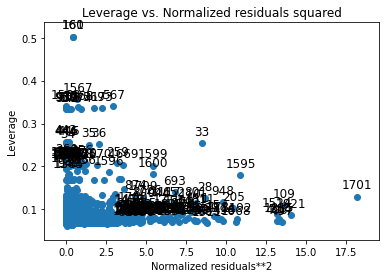

In [33]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
sm.graphics.plot_leverage_resid2(model)
plt.show()

# 화요일에 학원에서 봬요!
# 민규: 분류, 군집
# 재연: 정규화 선형회귀
# 재경: 일반화 선형회귀


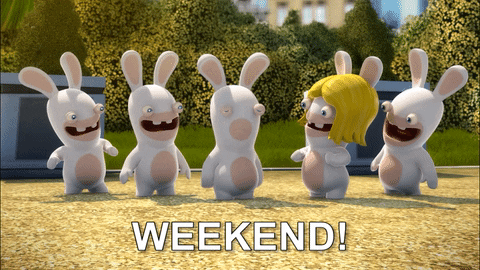

In [66]:
# gif 로 실행하고 싶은데 안돌아가네요ㅠ
from PIL import Image
image= Image.open("1.gif")
image
